In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import dateutil

In [2]:
import pandas as pd
df = pd.read_csv('New_York_Hourly.csv')[:10]
df[:10]

IOError: File New_York_Hourly.csv does not exist

In [17]:
# taking a look at all the conditions
sns.set_style("whitegrid")
sns.set_color_codes("muted")

def nycweather(filename):
    with open(filename, 'r') as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            conditions = row['Conditions']
            yield conditions
            

In [18]:
count = {}
for hod in nycweather('New_York_Hourly.csv'):
    count[hod] = count.get(hod, 0)+1

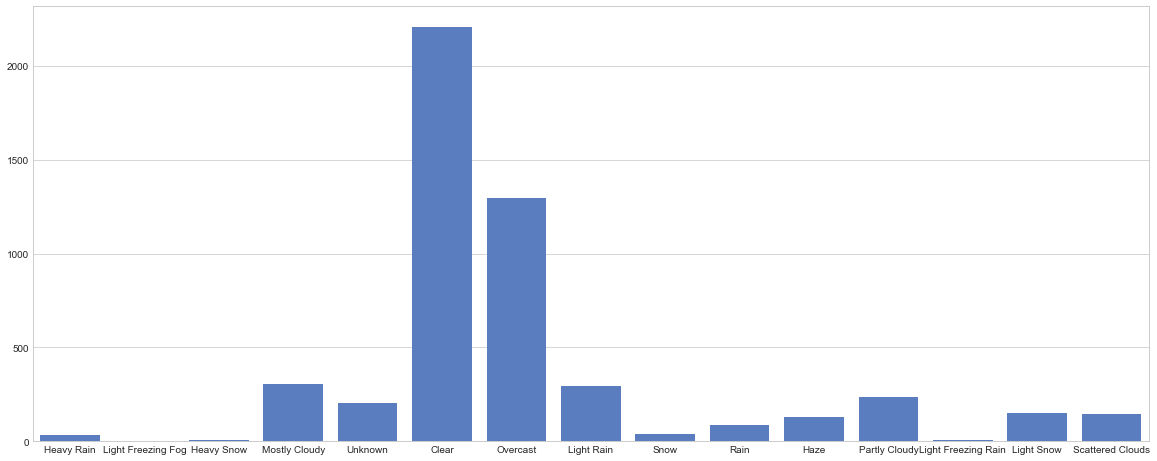

In [24]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=count.keys(), y=count.values(), color="b", ci=None)

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
sqlContext

In [6]:
df = spark.read.load('New_York_Hourly.csv', format='csv',
                    header=True, inferSchema=True)

In [8]:
df.dtypes

[('date', 'timestamp'),
 ('TimeEST', 'string'),
 ('TemperatureF', 'double'),
 ('Dew PointF', 'double'),
 ('Humidity', 'string'),
 ('Wind SpeedMPH', 'string'),
 ('Conditions', 'string')]

In [9]:
df.registerTempTable('NewYorkHourly')

In [10]:
sqlContext.sql('select * from NewYorkHourly limit 5')

DataFrame[date: timestamp, TimeEST: string, TemperatureF: double, Dew PointF: double, Humidity: string, Wind SpeedMPH: string, Conditions: string]

In [5]:
df2 = pd.read_csv('Data/weather2016nyc.csv')

In [12]:
df2 = df2.fillna('Normal')
df2

,Unnamed: 0,2016,Temp. (°F),Unnamed: 3
0,Normal,Jan,high,events
1,1/1/16,1,42,Normal
2,1/2/16,2,40,Normal
3,1/3/16,3,45,Normal
4,1/4/16,4,36,Normal
5,1/5/16,5,29,Normal
6,1/6/16,6,41,Normal
7,1/7/16,7,46,Normal
8,1/8/16,8,46,Normal
9,1/9/16,9,47,Rain


In [13]:
df2.to_csv('Data/Weather-Data-With-NonEmpty.csv', index=False, encoding='utf-8')